### Using dataset_model.csv on Loan Application, build a Classification model to predict Loan Status(Target Variable) 




**importing libraries**


In [0]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import *
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import *
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [608]:
df_model=pd.read_csv("/content/dataset_model.csv")
df_model.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [609]:
df_model.shape

(614, 13)

In [611]:
df_model.info

<bound method DataFrame.info of       Loan_ID  Gender Married  ... Credit_History Property_Area Loan_Status
0    LP001002    Male      No  ...            1.0         Urban           Y
1    LP001003    Male     Yes  ...            1.0         Rural           N
2    LP001005    Male     Yes  ...            1.0         Urban           Y
3    LP001006    Male     Yes  ...            1.0         Urban           Y
4    LP001008    Male      No  ...            1.0         Urban           Y
..        ...     ...     ...  ...            ...           ...         ...
609  LP002978  Female      No  ...            1.0         Rural           Y
610  LP002979    Male     Yes  ...            1.0         Rural           Y
611  LP002983    Male     Yes  ...            1.0         Urban           Y
612  LP002984    Male     Yes  ...            1.0         Urban           Y
613  LP002990  Female      No  ...            0.0     Semiurban           N

[614 rows x 13 columns]>

In [612]:
print(df_model.dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [613]:
df_model.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [614]:
#Checking if Loan ID has all unique values , and thus can be removed 
len(df_model['Loan_ID'].unique())

614

In [615]:
#Saving the Loan ID in the sequence of application in another dataframe
df_id = df_model['Loan_ID']
#Dropping Loan ID from Featureset
df_model=df_model.drop(columns='Loan_ID')
df_model.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [616]:
df_model.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Continous Columns**

In [617]:
num_cols = df_model._get_numeric_data().columns
cont_cols = []
for i in num_cols:
  if(len(df_model[i].unique())) > int(df_model.shape[0]/25):
     cont_cols.append(i)
print (cont_cols)  

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


**Categorical** 

In [618]:
cat_cols = list(set(df_model.columns) - set(cont_cols))
cat_cols

['Dependents',
 'Self_Employed',
 'Credit_History',
 'Loan_Status',
 'Loan_Amount_Term',
 'Property_Area',
 'Gender',
 'Married',
 'Education']

###  Use innovative methods for Outlier handling & Missing Values Imputation.

### **There are various methods of outlier handling such as :**
### Outlier Treatment for Continous Variables 

**Approaches**

1.   Flooring & Capping the Outliers using Quantiles
2.   Transformations - Logarithmic or Square Root

1.   Replacement using Median Values
2.   Removing the Outliers using IQR/Confidence Intervals


The methods that i am using are shown below



**Check Skewness & Data Distribution**

In [619]:
#Check Skewness
for i in cont_cols:
  print(str(i)+' : '+str(df_model[i].skew()))

ApplicantIncome : 6.539513113994625
CoapplicantIncome : 7.491531216657306
LoanAmount : 2.677551679256059


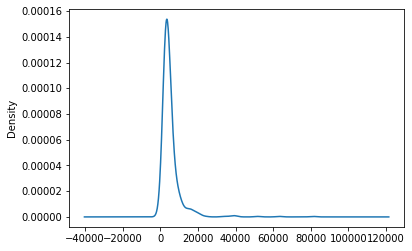

In [620]:
df_model['ApplicantIncome'].plot.kde()

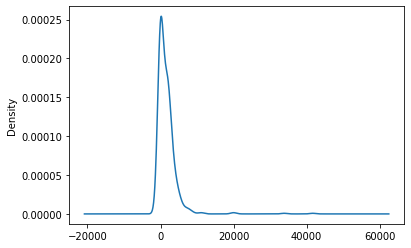

In [621]:
df_model['CoapplicantIncome'].plot.kde()

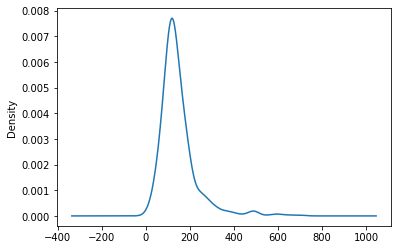

In [622]:
df_model['LoanAmount'].plot.kde()

**Outlier Handling using Quantile based capping**

In This technique,we will do the flooring(the 10th percentile) for the lower values and capping(the 90th percentile) for the higher values.The lines of code below print the 10th and 90th percentile of the variables 'Income','CoapplicantIncome','LoanAmount' These values are used for quantile based flooring and capping. after this we remove outliers and calculate skewness value again.

In [623]:
#Using Quantile flooring  at 10% & 90%
for i in cont_cols:
  #Defning the lower & upper cap/cutoff
  lower_cutoff = df_model[i].quantile(0.1)
  upper_cutoff = df_model[i].quantile(0.9)
  #Replacing the Outliers from both ends with capped cutoffs
  df_model[i] = np.where(df_model[i] < lower_cutoff,lower_cutoff,df_model[i])
  df_model[i] = np.where(df_model[i] > upper_cutoff, upper_cutoff,df_model[i])
  print('Revised skew after Outlier handling '+str(i)+' : '+str(df_model[i].skew()))

Revised skew after Outlier handling ApplicantIncome : 1.0177280847006973
Revised skew after Outlier handling CoapplicantIncome : 0.5184989987479341
Revised skew after Outlier handling LoanAmount : 0.6317364370380842


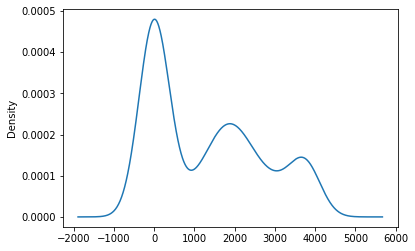

In [624]:
df_model['CoapplicantIncome'].plot.kde()

## **Performing Log Transformation for Outlier Treatment**

-0.19252212853031989


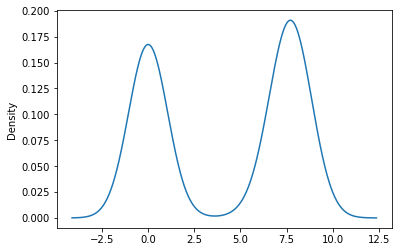

In [625]:
df_model["Log_CoapplicantIncome"] = df_model["CoapplicantIncome"].map(lambda i: np.log(i) if i > 0 else 0) 
print(df_model['Log_CoapplicantIncome'].skew())
df_model['Log_CoapplicantIncome'].plot.kde()

In [626]:
#df_model = df_model.drop(columns=["Log_CoapplicantIncome"])
df_model.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Log_CoapplicantIncome'],
      dtype='object')

## **Missing values Imputation**

Populate the Missing values in Categorical columns with Mode value



In [627]:
#Mode value for every field
df_model.mode().iloc[0]

Gender                        Male
Married                        Yes
Dependents                       0
Education                 Graduate
Self_Employed                   No
ApplicantIncome             2216.1
CoapplicantIncome                0
LoanAmount                      71
Loan_Amount_Term               360
Credit_History                   1
Property_Area            Semiurban
Loan_Status                      Y
Log_CoapplicantIncome            0
Name: 0, dtype: object

In [628]:
#Categorical Columns with missing values
df_model[cat_cols].isnull().sum()

Dependents          15
Self_Employed       32
Credit_History      50
Loan_Status          0
Loan_Amount_Term    14
Property_Area        0
Gender              13
Married              3
Education            0
dtype: int64

In [0]:
#Populating Categorical with Mode
for cols in cat_cols:
  if ( df_model[cols].isnull().sum() > 0):
    df_model[cols] = df_model[cols].fillna(df_model[cols].mode().iloc[0])

In [630]:
#Checking for missing values post Mode imputation
df_model[cat_cols].isnull().sum()

Dependents          0
Self_Employed       0
Credit_History      0
Loan_Status         0
Loan_Amount_Term    0
Property_Area       0
Gender              0
Married             0
Education           0
dtype: int64

Populate the Missing Values in Continous Columns value with Median


In [631]:
df_model.median()

ApplicantIncome          3812.500000
CoapplicantIncome        1188.500000
LoanAmount                128.000000
Loan_Amount_Term          360.000000
Credit_History              1.000000
Log_CoapplicantIncome       7.080284
dtype: float64

In [634]:
#Check which of continous columns have missing value
df_model[cont_cols].isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
dtype: int64

In [0]:
#Populate Continous with Median
for cols in cont_cols:
  if ( df_model[cols].isnull().sum() > 0):
    df_model[cols] = df_model[cols].fillna(df_model[cols].median())

In [636]:
#Check which of continous columns have missing value
df_model[cont_cols].isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
dtype: int64

In [637]:
df_model.shape

(614, 13)

## **Use Label Encoder as encoding technique on features , predict using below algorithms**

# **Encoding of Data**

**Splitting across the Target variable & Label Encode**

In [638]:

df_model.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Log_CoapplicantIncome'],
      dtype='object')

In [639]:
df_model.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Log_CoapplicantIncome
0,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y,0.000000
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N,7.318540
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,71.0,360.0,1.0,Urban,Y,0.000000
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y,7.765569
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y,0.000000


In [640]:
le = LabelEncoder()
df_target = pd.DataFrame(le.fit_transform(df_model['Loan_Status']))
df_target.columns = (['Loan_Status'])
df_target.head()


,Loan_Status
0,1
1,0
2,1
3,1
4,1


In [641]:
print(df_target['Loan_Status'].value_counts())
lbl_1,lbl_0 = df_target['Loan_Status'].value_counts()
print("Label 1 class %age: "+str((lbl_1*100)/df_target['Loan_Status'].count()))
print("Label 0 class %age: "+str((lbl_0*100)/df_target['Loan_Status'].count()))

1    422
0    192
Name: Loan_Status, dtype: int64
Label 1 class %age: 68.72964169381108
Label 0 class %age: 31.270358306188925


In [642]:
df_model=df_model.drop(columns='Loan_Status')
df_model.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Log_CoapplicantIncome'],
      dtype='object')

**Label Encode the Categorical Columns**

In [0]:
df = df_model.copy()

In [644]:
cat_cols = list(set(cat_cols) - set(['Loan_Status']))
cat_cols

['Dependents',
 'Self_Employed',
 'Credit_History',
 'Loan_Amount_Term',
 'Property_Area',
 'Gender',
 'Married',
 'Education']

In [645]:
for j in cat_cols :
  df['enc_'+str(j)] = le.fit_transform(df[j])
df_loan_le = df.drop(columns = cat_cols)
df_loan_le.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Log_CoapplicantIncome,enc_Dependents,enc_Self_Employed,enc_Credit_History,enc_Loan_Amount_Term,enc_Property_Area,enc_Gender,enc_Married,enc_Education
0,5849.0,0.0,128.0,0.000000,0,0,1,8,2,1,0,0
1,4583.0,1508.0,128.0,7.318540,1,0,1,8,0,1,1,0
2,3000.0,0.0,71.0,0.000000,0,1,1,8,2,1,1,0
3,2583.0,2358.0,120.0,7.765569,0,0,1,8,2,1,1,1
4,6000.0,0.0,141.0,0.000000,0,0,1,8,2,1,0,0


In [646]:

df_loan_le.shape

(614, 12)

Sparsity of records

In [647]:
#Checking Sparse rows , if >= 33.3% of columns of a record is not populated then remove the record itself
# Found no record Sparsely populated
rows_missing = df_model.isnull().sum(axis=1).reset_index() 
rows_missing.columns = ['row','mis_cnt']
rows_missing[(rows_missing['mis_cnt'] > int(df_model.shape[1]/3))]

,row,mis_cnt


### **1.Using Logistic Regression - Perform the parameter tuning and list your best performance metrics on -**

### Precision ,Recall & F1 Score ,AUROC 

## **Train Test Split**

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(df_loan_le, df_target, test_size=0.25, random_state=54 , stratify=df_target)

In [649]:

print("Train Feature set:\t"+str(len(X_train)))
print("Train Label Feature set:\t"+str(len(Y_train)))
print("Test Feature set:\t"+str(len(X_test)))
print("Test label set:\t"+str(len(Y_test)))

Train Feature set:	460
Train Label Feature set:	460
Test Feature set:	154
Test label set:	154


In [650]:
#Stratified Sampling
print("For Training Data :")
print(Y_train['Loan_Status'].value_counts())
lbl_1,lbl_0 = Y_train['Loan_Status'].value_counts()
print("Label 1 class %age: "+str((lbl_1*100)/Y_train['Loan_Status'].count()))
print("Label 0 class %age: "+str((lbl_0*100)/Y_train['Loan_Status'].count()))
print("\nFor Test Set :")
print(Y_test['Loan_Status'].value_counts())
lbl_1,lbl_0 = Y_test['Loan_Status'].value_counts()
print("Label 1 class %age: "+str((lbl_1*100)/Y_test['Loan_Status'].count()))
print("Label 0 class %age: "+str((lbl_0*100)/Y_test['Loan_Status'].count()))

For Training Data :
1    316
0    144
Name: Loan_Status, dtype: int64
Label 1 class %age: 68.69565217391305
Label 0 class %age: 31.304347826086957

For Test Set :
1    106
0     48
Name: Loan_Status, dtype: int64
Label 1 class %age: 68.83116883116882
Label 0 class %age: 31.16883116883117


## **Logistic Regression**

In [0]:
lr=LogisticRegression(random_state=54) #without tuning

In [654]:
lr.fit(X_train,Y_train)
print(lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=54, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [491]:
y_pred = lr.predict(X_test)
y_pred

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0])

**Metrics of Evaluation**

In [655]:
#Using Logistic without Gridsearch
print("----Parameter tuning without GridSearch-----")
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Accuracy of logistic Model:")
print(accuracy_score(Y_test, y_pred))
print("Precision of logistic Model:")
print (precision_score(Y_test, y_pred))
print ("Recall of logistic Model:" )
print( recall_score(Y_test, y_pred))
print ("F1 Score of logistic Model:")
print (f1_score(Y_test, y_pred))


----Parameter tuning without GridSearch-----
Confusion Matrix
[[24 24]
 [10 96]]
Accuracy of logistic Model:
0.7792207792207793
Precision of logistic Model:
0.8
Recall of logistic Model:
0.9056603773584906
F1 Score of logistic Model:
0.8495575221238938


## **GridSearchCV**

In [0]:
#Using GridSearch , find the optimal hyperparameters
lr1=LogisticRegression()
dual=[True,False]
max_iter=[100,110,120,130,140]
solver=['lbfgs','sag','saga','newton-cg','liblinear']
multi_class=['auto']

param_grid=dict(dual=dual,max_iter=max_iter,solver=solver,multi_class=multi_class)

In [494]:
import time
grid=GridSearchCV(estimator=lr1,param_grid=param_grid,cv=5,n_jobs=-1)
start_time=time.time
grid_result=grid.fit(X_train,Y_train)
clf_best_dt = grid.best_estimator_
print(clf_best_dt)
y_pred = clf_best_dt.predict(X_test)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [658]:
#Using Gridsearch optimal parameter tuning
print("----Parameter tuning using GridSearch-----")
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Accuracy of logistic Model:")
print(accuracy_score(Y_test, y_pred))
print("Precision of logistic Model:")
print (precision_score(Y_test, y_pred))
print ("Recall of logistic Model:" )
print( recall_score(Y_test, y_pred))
print ("F1 Score of logistic Model:")
print (f1_score(Y_test, y_pred))

----Parameter tuning using GridSearch-----
Confusion Matrix
[[24 24]
 [10 96]]
Accuracy of logistic Model:
0.7792207792207793
Precision of logistic Model:
0.8
Recall of logistic Model:
0.9056603773584906
F1 Score of logistic Model:
0.8495575221238938


In [659]:
roc_auc_score(Y_test,y_pred)

0.7028301886792453

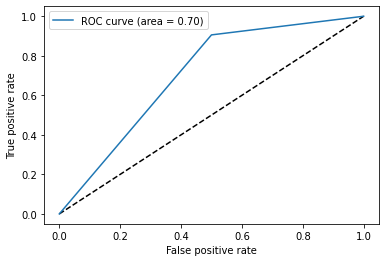

In [660]:
fpr, tpr, thresholds = roc_curve(Y_test,y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(Y_test,y_pred))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')

## **2.Using RandomForest Classifier - Perform the parameter tuning and list your best performance metrics on**

### Precision ,Recall & F1 Score ,AUROC 

## **Random Forest Classifier**



In [661]:
rf = RandomForestClassifier(random_state=54)

rf.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=54, verbose=0,
                       warm_start=False)

In [0]:
y_pred = rf.predict(X_test)

In [663]:
print(y_pred)

[1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0
 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1
 1 1 1 0 1 0]


**Metrics of Evaluation**

In [664]:
#Using Dtree without Gridsearch
print("----Parameter tuning without GridSearch-----")
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Accuracy of random Model:")
print(accuracy_score(Y_test, y_pred))
print("Precision of random Model:")
print (precision_score(Y_test, y_pred))
print ("Recall of random Model:" )
print( recall_score(Y_test, y_pred))
print ("F1 Score of random Model:")
print (f1_score(Y_test, y_pred))


----Parameter tuning without GridSearch-----
Confusion Matrix
[[24 24]
 [10 96]]
Accuracy of random Model:
0.7792207792207793
Precision of random Model:
0.8
Recall of random Model:
0.9056603773584906
F1 Score of random Model:
0.8495575221238938


## **GridSearchCV**

In [0]:
rf=RandomForestClassifier()  

In [0]:
param_grid={'n_estimators' : [200,500], 'max_features' : ['sqrt','log2'],'max_depth' : [4,5,6,7,8],'criterion' : ['gini','entropy']}

In [667]:
CV_rfc=GridSearchCV(estimator=rf,param_grid=param_grid,cv=6)
CV_rfc.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=6, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [668]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 500}

In [671]:
#Using Gridsearch optimal parameter tuning
print("----Parameter tuning using GridSearch-----")
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Accuracy of random Dtree Model:")
print(accuracy_score(Y_test, y_pred))
print("Precision of random  DTree Model:")
print (precision_score(Y_test, y_pred))
print ("Recall of random DTree Model:" )
print( recall_score(Y_test, y_pred))
print ("F1 Score of random DTree Model:")
print (f1_score(Y_test, y_pred))

----Parameter tuning using GridSearch-----
Confusion Matrix
[[24 24]
 [10 96]]
Accuracy of random Dtree Model:
0.7792207792207793
Precision of random  DTree Model:
0.8
Recall of random DTree Model:
0.9056603773584906
F1 Score of random DTree Model:
0.8495575221238938


In [672]:
roc_auc_score(Y_test,y_pred)

0.7028301886792453

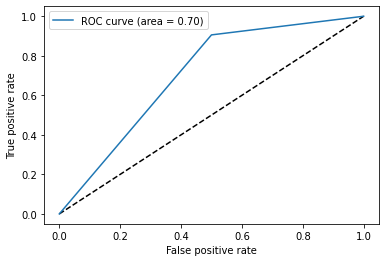

In [673]:
fpr, tpr, thresholds = roc_curve(Y_test,y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(Y_test,y_pred))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')

## **Use One hot Encoder as encoding technique on feature , predict using the below algorithm**

### **OHE Categorical Columns**

In [0]:
df_ohe = df_model.copy()

In [682]:
cat_cols

['Dependents',
 'Self_Employed',
 'Credit_History',
 'Loan_Amount_Term',
 'Property_Area',
 'Gender',
 'Married',
 'Education']

In [683]:
for j in cat_cols :
   df_ohe = pd.get_dummies(df_ohe, columns=[j], prefix=[j] )
df_ohe.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Log_CoapplicantIncome,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Loan_Amount_Term_12.0,Loan_Amount_Term_36.0,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate
0,5849.0,0.0,128.0,0.000000,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0
1,4583.0,1508.0,128.0,7.318540,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0
2,3000.0,0.0,71.0,0.000000,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,1,0
3,2583.0,2358.0,120.0,7.765569,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1
4,6000.0,0.0,141.0,0.000000,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0


In [686]:
df_ohe.shape


(614, 31)

**Train Test Split**

Used to Split the Training dataset into Training the model & Testing the model

Stratified Sampling : proportion of classes (0/1) in Training & Testing sets is maintained w.r.t that present in actual dataset

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(df_ohe, df_target, test_size=0.25, random_state=54 , stratify=df_target)

In [699]:
print("Train Feature set:\t"+str(len(X_train)))
print("Train Label Feature set:\t"+str(len(Y_train)))
print("Test Feature set:\t"+str(len(X_test)))
print("Test label set:\t"+str(len(Y_test)))

Train Feature set:	460
Train Label Feature set:	460
Test Feature set:	154
Test label set:	154


In [700]:
#Stratified Sampling
print("For Training Data :")
print(Y_train['Loan_Status'].value_counts())
lbl_1,lbl_0 = Y_train['Loan_Status'].value_counts()
print("Label 1 class %age: "+str((lbl_1*100)/Y_train['Loan_Status'].count()))
print("Label 0 class %age: "+str((lbl_0*100)/Y_train['Loan_Status'].count()))
print("\nFor Test Set :")
print(Y_test['Loan_Status'].value_counts())
lbl_1,lbl_0 = Y_test['Loan_Status'].value_counts()
print("Label 1 class %age: "+str((lbl_1*100)/Y_test['Loan_Status'].count()))
print("Label 0 class %age: "+str((lbl_0*100)/Y_test['Loan_Status'].count()))

For Training Data :
1    316
0    144
Name: Loan_Status, dtype: int64
Label 1 class %age: 68.69565217391305
Label 0 class %age: 31.304347826086957

For Test Set :
1    106
0     48
Name: Loan_Status, dtype: int64
Label 1 class %age: 68.83116883116882
Label 0 class %age: 31.16883116883117


## **3.Using Logistic Regression - Perform the parameter tuning and list your best performance metrics on -**

### *Precision ,Recall & F1 Score ,AUROC*

## **Logistic Regression**

In [0]:
lr3=LogisticRegression(random_state=54)

In [702]:
lr3.fit(X_train,Y_train)
print(lr3)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=54, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [703]:
y_pred = lr3.predict(X_test)
y_pred

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0])

**Metrics of evaluation**

In [704]:
#Using logistic regression without Gridsearch
print("----Parameter tuning without GridSearch-----")
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Accuracy of Logistic Model:")
print(accuracy_score(Y_test, y_pred))
print("Precision of Logistic Model:")
print (precision_score(Y_test, y_pred))
print ("Recall of Logistic Model:" )
print( recall_score(Y_test, y_pred))
print ("F1 Score of Logistic Model:")
print (f1_score(Y_test, y_pred))



----Parameter tuning without GridSearch-----
Confusion Matrix
[[ 22  26]
 [  4 102]]
Accuracy of Logistic Model:
0.8051948051948052
Precision of Logistic Model:
0.796875
Recall of Logistic Model:
0.9622641509433962
F1 Score of Logistic Model:
0.8717948717948717


Parameter Tuning using GridSearchCV using One Hot Encoding

In [0]:
#Using GridSearch , find the optimal hyperparameters
lr3=LogisticRegression()
dual=[True,False]
max_iter=[100,110,120,130,140]



param_grid=dict(dual=dual,max_iter=max_iter)

In [706]:
import time
grid=GridSearchCV(estimator=lr,param_grid=param_grid,cv=5,n_jobs=-1)
start_time=time.time
grid_result=grid.fit(X_train,Y_train)
clf_best_dt = grid.best_estimator_
print(clf_best_dt)
y_pred = clf_best_dt.predict(X_test)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=120,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=54, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Metrics Evaluation**

In [707]:
#Using Gridsearch optimal parameter tuning
print("----Parameter tuning using GridSearch-----")
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Accuracy of logistic Model:")
print(accuracy_score(Y_test, y_pred))
print("Precision of logistic Model:")
print (precision_score(Y_test, y_pred))
print ("Recall of logistic Model:" )
print( recall_score(Y_test, y_pred))
print ("F1 Score of logistic Model:")
print (f1_score(Y_test, y_pred))

----Parameter tuning using GridSearch-----
Confusion Matrix
[[ 22  26]
 [  4 102]]
Accuracy of logistic Model:
0.8051948051948052
Precision of logistic Model:
0.796875
Recall of logistic Model:
0.9622641509433962
F1 Score of logistic Model:
0.8717948717948717


In [708]:
roc_auc_score(Y_test,y_pred)

0.7102987421383649

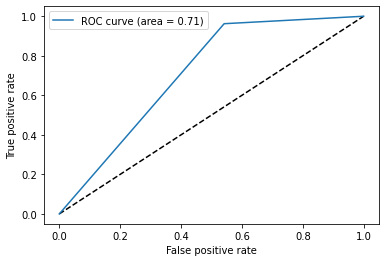

In [709]:
fpr, tpr, thresholds = roc_curve(Y_test,y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(Y_test,y_pred))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')

### **4.Using RandomForest Classifier - Perform the parameter tuning and list your best performance metrics on -**

### Precision ,Recall & F1 Score ,AUROC 

In [710]:
rf2 = RandomForestClassifier(random_state=54)

rf2.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=54, verbose=0,
                       warm_start=False)

In [0]:
y_pred = rf2.predict(X_test)

In [712]:
print(y_pred)

[1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0
 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1
 1 1 1 0 1 0]


**Metrics of Evaluation**

In [713]:
#Using Dtree without Gridsearch
print("----Parameter tuning without GridSearch-----")
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Accuracy of random Model:")
print(accuracy_score(Y_test, y_pred))
print("Precision of random Model:")
print (precision_score(Y_test, y_pred))
print ("Recall of random Model:" )
print( recall_score(Y_test, y_pred))
print ("F1 Score of random Model:")
print (f1_score(Y_test, y_pred))


----Parameter tuning without GridSearch-----
Confusion Matrix
[[24 24]
 [ 9 97]]
Accuracy of random Model:
0.7857142857142857
Precision of random Model:
0.8016528925619835
Recall of random Model:
0.9150943396226415
F1 Score of random Model:
0.8546255506607929


Performing tuning using GridSearchCV for random forest

In [0]:
rf4=RandomForestClassifier()

In [0]:
param_grid={'n_estimators' : [200,500], 'max_features' : ['sqrt','log2'],'max_depth' : [4,5,6,7,8],'criterion' : ['gini','entropy']}

In [716]:
CV_rfc2=GridSearchCV(estimator=rf4,param_grid=param_grid,cv=6)
CV_rfc2.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=6, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [717]:
CV_rfc2.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [718]:
#Using Gridsearch optimal parameter tuning
print("----Parameter tuning using GridSearch-----")
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Accuracy of random Dtree Model:")
print(accuracy_score(Y_test, y_pred))
print("Precision of random  DTree Model:")
print (precision_score(Y_test, y_pred))
print ("Recall of random DTree Model:" )
print( recall_score(Y_test, y_pred))
print ("F1 Score of random DTree Model:")
print (f1_score(Y_test, y_pred))

----Parameter tuning using GridSearch-----
Confusion Matrix
[[24 24]
 [ 9 97]]
Accuracy of random Dtree Model:
0.7857142857142857
Precision of random  DTree Model:
0.8016528925619835
Recall of random DTree Model:
0.9150943396226415
F1 Score of random DTree Model:
0.8546255506607929


In [719]:
roc_auc_score(Y_test,y_pred)

0.7075471698113207

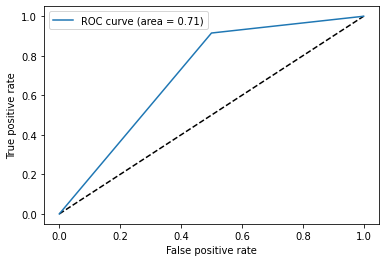

In [720]:
fpr, tpr, thresholds = roc_curve(Y_test,y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(Y_test,y_pred))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')

### **Which approach between Label Encoding & One Hot Encoding gave better results in case of both the algorithms used ?**

In case of label encoding the accuracy is almost same for both logistic regression and for random forest classifier but in case of One Hot encoding the accuracy is slightly increases for both logistic regression and for random forest classifier. The AUROC curve for label encoding in both i.e in logistic regression and random forest classifier is 0.70  but it increases slightly for one hot encoding i.e it becomes 0.71 for both logistic regression and random forest classifier.